<a href="https://colab.research.google.com/github/jaekyoungkim/floor_DL/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_(ch5_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/youbeebee/deeplearning_from_scratch

Cloning into 'deeplearning_from_scratch'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 58.06 MiB | 40.89 MiB/s, done.
Resolving deltas: 100% (74/74), done.


# ch 5. 오차역전파법 

In [ ]:
# 앞장에서 신경망의 가중치 매개변수의 기울기는 수치미분을 사용해 계산함
# 수치 미분은 단순하고 구현하기도 쉽지만 계산시간이 오래걸린다는게 단점 
# 가중치 매개변수의 기울기를 효율적으로 계산하는 오차역전파법
# 계산 그래프를 사용하는 이유 : 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집주앟여 문제를 단순화 시킬 수 있음 + 중간결과 저장가능 + 역전파 통해 미분을 효율적으로 계산
# 연쇄법칙 

In [39]:
# 사과쇼핑 예를 파이썬으로 구현하기
# 모든 게층은 forward() backward() 라는 공통의 메서드를 갖도록 구현함
# forward 순전파, backward 역전파
# 곱셈 계층은 mullayer
class MuLayer:
  def __init__(self): # x,y,를 초기화
    self.x = None
    self.y = None
  
  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out
  
  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx, dy

In [40]:
apple = 100
apple_num =2 
tax = 1.1

# 계층들
mul_apple_layer = MuLayer()
mul_tax_layer = MuLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [41]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [ ]:
# 덧셈계층
class AddLayer:
  def __init__(self):  # 덧셈 계층에서는 초기화가 필요없음 아무일도 안함
    pass
  
  def forward(self, x, y):
    out = x+y
    return out 
  
  def backward(self, dout): 
    dx = dout * 1 
    dy = dout * 1
    return dx, dy

In [ ]:
# 사과 2개, 귤3개구입에 대한 역전파
apple = 100
apple_num =2 
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MuLayer()
mul_orange_layer = MuLayer()
add_apple_orange_layer =AddLayer()
mul_tax_layer = MuLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price , dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price =add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [ ]:
# 활성화 함수 계층 구성하기
# 1. relu
# x > 0 : 역전파는 상류의 값을 그대로 하류로 흘림
# x < 0 : 역전파는 하류로 신호를 보내지 않음
class Relu:
  def __init__(self):
    self.mask = None  #  true, false로 구성된 넘파이 배열 
  
  def forward(self, x):
    self.mask = (x<=0) # x 0이하는 true, 0 초과는 FALSE
    out = x.copy()
    out[self.mask] = 0 
    return out
  
  def backward(self, dout):
    dout[self.mask] = 0 
    dx = dout
    return dx 

In [ ]:
import numpy as np
x = np.array([[1.0, 0.5], [-2.0, 3.0]])
print(x)

mask = (x <= 0)
print(mask) 

[[ 1.   0.5]
 [-2.   3. ]]
[[False False]
 [ True False]]


In [ ]:
# 2. sigmoid 계층
# x-> y  : y^2 * exp(-x) 가 하류 노드로 전파됨  / y(1-y):순전파의 출력(y)만으로 계산할수도있음
class Sigmoid:
  def __init__(self):
    self.out = None
  
  def forward(self, x):
    out = 1/(1+np.exp(-x))
    self.out = out 
    return out
  
  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx



In [ ]:
# Affine / softmax계층 구현하기
# 1. affine 계층
# 신경망의 순전파때 수행하는 행렬의 곱은 기하학에서는 어파인 변환이라고 함



In [ ]:
# 배치용 affine 계층
# 입력데이터로 x하나만을 고려하지 않고, 데이터 n개를 묶어 순전파하는경우(묶은 데이터를 배치라고 함)
x_dot_W = np.array([[0,0,0], [10,10,10]])
B = np.array([1,2,3])

x_dot_W 

array([[ 0,  0,  0],
       [10, 10, 10]])

In [ ]:
x_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [ ]:
dY = np.array([[1,2,3], [4,5,6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
dB = np.sum(dY, axis=0); dB # 같은 위치에 있는 원소끼리 합쳐줌, 0 번째 축으로 합치기
# 편향의 역전파는 n=2라고 가정하면, 그 두 데이터에 대한 미분을 데이터마다 더해수 구함

array([5, 7, 9])

In [ ]:
np.sum(dY, axis=1) # 1번째 축으로 합치기

array([ 6, 15])

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


def cross_entropy_error(y, t):
    delta = 1e-7  # 0일때 -무한대가 되지 않기 위해 작은 값을 더함
    return -np.sum(t * np.log(y + delta))


In [42]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None

  def forward(self,x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)  # x에대한 역전파
    self.dW = np.dot(self.x.T, dout) #w에대한 역전파
    self.db = np.sum(dout, axis= 0) # 배치결과들을 합치기
    return dx

In [43]:
# 2. softmax-with-loss 계층
# 소프트맥스 함수는 입력값을 정규화하여 출력함
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None
  
  def forward(self, x, t):
    self.t = t
    self.y = softmax(t)
    self.loss = cross_entropy_error(self.y , self.t)
    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size # 전파하는 값을 배치의 수로 나눠서 데이터 1개당 오차를 앞 계층으로 전파함
    return dx


In [44]:
# 오차역전파 구현하기
# 수치미분은 구현하기는 쉽지만 계산이 오래 걸림 -> 오차역전파법을 이용하면 느린 수치미분과 달리 기울기를 효율적으로 빠르게 구할 수 있음
# numerical_gradient : 수치미분방식
# gradient : 오차역전파법

In [49]:
import sys , os
#sys.path.append('/content/deeplearning_from_scratch/common')
sys.path.append('/content/deeplearning_from_scratch/')
import numpy as np 
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
from common.multi_layer_net import *

In [36]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std= 0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size , hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

    #계층생성 
    self.layers = OrderedDict() # 순서가 있는 딕셔너리 
    # 순전파때는 추가한 순서대로 각 계층에 forward메서드를 호출하기만 하면 됨
    # 역전파때는 계층을 반대 순서로 호출하면됨
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    self.lastlayer = SoftmaxWithLoss()

  def predict(self,x): #예측
    for layer in self.layers.values():
      x = layer.forward(x)
    
    return x

  # x 입력데이터, t 정답 레이블
  def loss(self, x, t):
    y= self.predict(x)
    return self.lastLayer.forward(y,t)
  
  def accuracy(self, x, t):
    y=self.predict(x)
    y= np.argmax(y, axis=1)
    if t.ndim !=1 : t= np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy


  def numerical_gradient(self, x, t):
    loss_W = lambda W : self.loss(x,t)
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads
    


  def gradient(self, x, t):
    # 순전파
    self.loss(x,t)

    # 역전파
    dout = 1
    dout = self.lastLayer.backward(dout)
    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    # 결과저장
    grads = {}
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db 
    
    return grads   

In [37]:
# 오차역전파법으로 구한 기울기 검증하기
# 1. 수치미분 
# 2. 해석적으로 수식을 풀어 구하는 방법, 매개변수가 많아도 효율적으로 계산할 수 있음
# 수치미분은 오차역전파법을 정확히 구현했는지 확인하기 위해 필요함
# 수치미분의 장점은 구현하기 쉽다는 것
# 수치미분구현에는 버그가 숨어있기 어려운반면, 오차역전파법은 구현하기 복잡해서 종종 실수를 하곤 함
# 기울기확인 : 1,2방법의 결과가 같은지 확인

In [46]:
from dataset.mnist import load_mnist
from common.two_layer_net import TwoLayerNet  # ch5 에 들어있는 two_layer_net 파일 common으로 옮기기

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size= 10)
x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 차이의 절댓값을 구한 후 그 절댓값들의 평균을 구함
for key in grad_numerical.keys():
  diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]))
  print(key + ":" + str(diff))  # 차이가 매우작음을 알 수 있음

W1:2.2260574784664928e-13
b1:6.023729865606287e-13
W2:7.829423153370412e-13
b2:1.2034817170603062e-10


In [ ]:
# 오차역전파를 사용한 학습 구현하기
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size=10)
iters_num = 10000
train_size = x_train.shape[0] ;train_size # 60000


60000

In [ ]:
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)
for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size) 
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #오차역전파법으로 기울기 구하기
  grad = network.gradient(x_batch, t_batch)

  # 갱신
  for key in ('W1','b1','W2','b2'):
    network.params[key] -= learning_rate * grad[key]
  
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i% iter_per_epoch ==0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(train_acc, test_acc)

0.14916666666666667 0.1508
0.9021666666666667 0.9051
0.9216333333333333 0.9233
0.9330333333333334 0.9354
0.94485 0.9425
0.9507166666666667 0.9488
0.9563833333333334 0.9514
0.9596333333333333 0.9545
0.9636 0.9579
0.9663333333333334 0.9608
0.9667166666666667 0.9609
0.9706833333333333 0.965
0.9728 0.9657
0.9729666666666666 0.9665
0.9751166666666666 0.9683
0.97425 0.9672
0.97835 0.9711


# ch 6. 학습 관련 기술들 

In [ ]:
# 최적화 : 신경망의 최적화는 굉장히 어려운 문제 , 매개변수 공간은 매우넓고 복잡해서 최적의 솔루션은 쉽게 못찾음
# 매개변수 갱신
# SGD보다 좋은 최적화 방법들을 알아보고자 함


In [ ]:
# 1. SGD
class SGD:
  def __init__(self, lr = 0.01):
    self.lr = lr
  
  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

In [ ]:
#network = TwoLayerNet(...)
#optimizer = SGD() #  이부분을 바꾸면됨
#for i in range(10000):
# x_batch, t_batch = get_mini_batch(...)
# grads = network.gradient(x+batch, t_batch)
# params = network.params
# optimizer.update(params, grads) 

# SGD의 단점 : 단순하고 구현도 쉽지만, 비등방성함수에서는 탐색경로가 비효율적 ,무작정 기울어진 방향으로 진행하는 단순한 방식

In [ ]:
# 2. Momentum (운동량)
class Momentum():
  def __init__(self, lr = 0.01, momentum = 0.9): # v 물체의 속도
    self.lr = lr
    self.momentum = momentum
    self.v = None
  
  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)  # 초기 array생성해줌
      
    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]  # params = Weight


In [2]:
# 3. AdaGrad
# 신경망 학습에서 학습률값이 중요
# 이 값이 너무 작으면 학습시간이 너무 길어지고, 너무크면 발산하여 학습이 제대로 이뤄지지 않음
# 학습률을 정하는 효과적기술로 학습률 감소가 있음
# 학습을 진행하면서 학습률을 점차 줄여가는 방법
# 처음에는 크게 학습하다가 조금씩 작게 학습한다는 것 (실제 신경망 학습에 자주 사용됨)
# 학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 전체의 학습률 값을 일괄적으로 낮추는것
# 각각의 매개변수에 맞춤형값을 만들어줌
# 학습을 진행할수록 갱신강도가 약해짐 실제로 무한히 계속 학습하다보면  어느순간 갱신량이 0이되어 전혀 갱신되지 않음
class AdaGrad:
  def __init__(self, lr = 0.01):
    self.lr = lr
    self.h = None
  def update(self , params, grads):
    if self.h is None:
      self.h = {}
      for key , val in params.items():
        self.h[key] = np.zeros_like(val)
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)  # 아주 작은값을 추가로더해줌

# 최솟값을 향해 효율적으로 움직임, 처음에는 크게 움직이지만 그 큰 움직임에 비례해 갱신 정도도 큰폭으로 작아지도록 조정
# y축 방향으로 갱신속도가 빠르게 약해지고, 지그재그 움직임이 감소

In [3]:
# 4. Adam
# 모멘텀은 공이 그릇 바닥을 구르는듯함 움직임을 보였음. adagrad는 매개변수의 원소마다 적응적으로 갱신정도를 조정함
# 2015년에 제안된 방법 , 이론은 다소 복잡하지만 직관적으로는 모멘텀과 adagrad를 융합한 방법
# 편향보정이 진행됨
# 모멘텀과 비슷한 패턴인데, 공의 좌우 흔들림이 적음
# 학습의 갱신속도를 적응적으로 조정해서 얻는 혜택이 있음
# 파라미터가 3개임 : 지금까지의 학습률, 일차모멘텀용 계수, 이차 모멘텀용 계수 (기본값은 0.9, 0.999)


In [5]:
# 주로, SGD, ADAM을 사용

In [6]:
# 가중치감소 (Weight decay) : 가중치 매개변수의 값이 작아지도록 학습하는 방법, 가중치값을 작게하여 오버피팅이 일어나지 않게 하는것
# 가중치 초깃값을 0으로 하면 학습이 올바로 이뤄지지않음
# 이유 : 오차역전파법에서 모든 가중치의 값이 똑같이 갱신됨
# 가중치가 고르게 되어버리는 상황을 막으려면 (가중치의 대칭적인 구조를 무너뜨리려면) 초깃값을 무작위로 설정해야함

In [12]:
# 은닉층의 활성화값 분포
# 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변하는지 실험
# weight_init_activation_histogramp.py 참고하기
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


In [16]:
hidden_layer_size

5

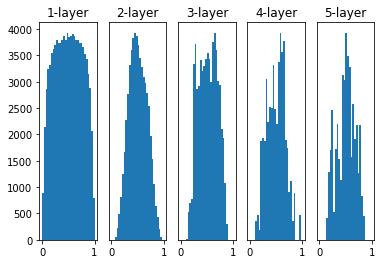

In [9]:

######################################################
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0: # 맨첨에는 여길 안지남
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z # activation의 값을 하나씩 채워나감

# 히스토그램 그리기
for i, a in activations.items(): 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()


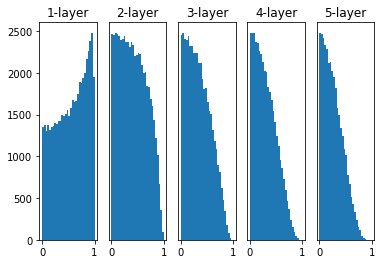

In [20]:

######################################################
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()


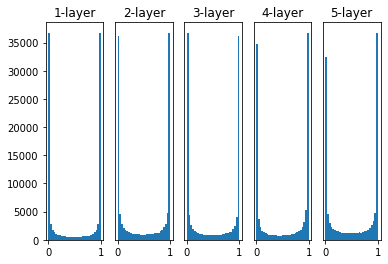

In [21]:

######################################################
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()
# 각 층의 활성화값들이 0과 1에 치우쳐져 있음
# 데이터가 0/1에 치우쳐분포하게되면 역전파의 기울기 값이 점점 작아지다가 사라짐(기울기 소실)
# 층을 깊게하는 딥러닝에서는 기울기 소실은 더 심각한 문제가됨
# 

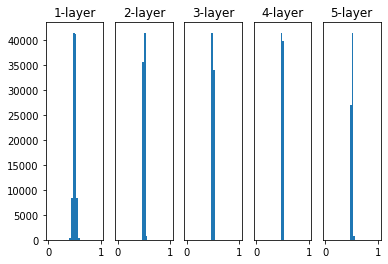

In [24]:

######################################################
# 표준편차를 0.01로 바꿈
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()
# 0.5 부근에 집중되어있음
# 0과 1에 치우치진않지만 기울기 소실문제는 없지만, 활성화값들이 치우쳤다는것은 표현력 관점에서는 쿤문제가 있는것
# 다수의 뉴런이 거의 같은값을 출력하고있으니 뉴런을 여러개 둔 의미가 없어짐
# 각 층의 활성화값은 적당히 고루 분포되어야함
# 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망학습이 효율적으로 이뤄짐
# 반대로 치우친 데이터가 흐르면 기울기 소실이나 표현력 제한 문제에 빠져서 학습이 잘 이뤄지지않는경우가 생김


In [25]:
# 벤지오, 글로로트 논문에서는 권장하는 가중치 초깃값인 : xavier 초깃값을 사용
# xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고있음
# 카페 프레임워크는 가중치 초깃값을 설정할때 인수로 xavier로 지정할 수 있음
# 앞 계층의 노드가 n개라면 표준편차가 1/root(n)인 분포를 사용하면 된다는 결론


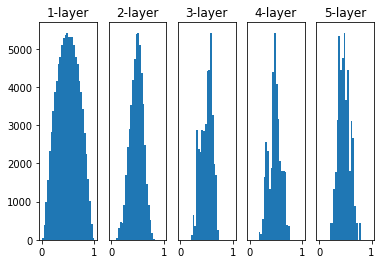

In [28]:
# xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼져나감

######################################################
# 표준편차를 0.01로 바꿈
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)  # 사비에르 초깃값
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()
# 층이 깊어지면서 갈수록 약간씩 일그러지고있음
# 앞에서 본 방식보다는 확실히 넓게 분포함
# 각층에 흐르는 데이터는 적당히 퍼져있으므로, 시그모이드 함수의 표현력도 제한받지 않음


In [30]:
# HE초깃값
# Sigmoid, tanh함수는 좌우대칭이라 중앙부근이 선형인 함수로 볼수있음
# RELU를 사용할때는 이에 특화된 초깃값을 이용하라고 권장함 > he초깃값
# 모든층에서 균일하게 분포함을 확인, 층이 깊어져도 분포가 균일하게 유지되기에 역전파 할때도 적절한 값이 나올것으로 기대됨


In [31]:
# RELU => HE 초기값
# Sigmoid, tanh => xavier 초기값

In [32]:
# 배치정규화
# 각층이 활성화를 적당히 퍼뜨리도록 강제하기
# 2015년에 제안된 방법
# 나온지 얼마 안된 기법임에도 많은 연구자와 기술자가 즐겨 사용하고있음
# 학습을 빨리 진행할수있다(학습속도개선) + 초깃값에 크게 의존하지않음 + 오버피팅을 억제(드롭아웃등의 필요성 감소)
# affine - BN - relu - affine - BN - relu ...
# 학습시 미니배치를 단위로 정규화, 데이터 분포가 평균1, 분산1이 되도록 정규화 [x1....xm] m개의 입력데이터에 대한 평균과 분산
# 해당작업을 활성화함수의 앞혹은 뒤에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있음
# 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동변환을 수행함
# y = gamma * x hat + beta
# 효과 : 학습 속도를 높임

In [47]:
#오버피팅 : 훈련데이터가 적거나 매개변수가 많고 표현력이 높은 모델에서 발생함
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]


In [52]:
from common.optimizer import SGD
network = MultiLayerNet(input_size= 784, hidden_size_list= [100,100,100,100,100,100], output_size= 10)
optimizer = SGD(lr = 0.01)

In [54]:
max_epochs = 201
train_size = x_train.shape[0] ; 
batch_size = 100
train_size

300

In [55]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(100000):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grads = network.gradient(x_batch, t_batch)
  optimizer.update(network.params, grads)

  if i % iter_per_epoch == 0 :
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    epoch_cnt += 1
    if epoch_cnt >= max_epochs:
      break

In [57]:
print(test_acc_list)

[0.0875, 0.0937, 0.1005, 0.1066, 0.1138, 0.124, 0.1372, 0.1482, 0.1621, 0.1774, 0.1989, 0.2213, 0.2482, 0.2638, 0.2822, 0.3013, 0.3093, 0.3388, 0.3672, 0.3751, 0.4025, 0.4028, 0.4257, 0.4258, 0.4477, 0.4789, 0.4868, 0.487, 0.5037, 0.5207, 0.539, 0.5459, 0.5589, 0.5659, 0.5815, 0.5946, 0.5978, 0.6046, 0.615, 0.6234, 0.6263, 0.627, 0.6263, 0.6379, 0.641, 0.6353, 0.6439, 0.6471, 0.6524, 0.6536, 0.6557, 0.6671, 0.6717, 0.6684, 0.6654, 0.6746, 0.6748, 0.6817, 0.6796, 0.6767, 0.6808, 0.6838, 0.6822, 0.6847, 0.6899, 0.6784, 0.6928, 0.6945, 0.6975, 0.6906, 0.7, 0.7019, 0.6976, 0.699, 0.6992, 0.6956, 0.6961, 0.6986, 0.6871, 0.6994, 0.7036, 0.6948, 0.7064, 0.7052, 0.7158, 0.7131, 0.7118, 0.7138, 0.7141, 0.7186, 0.7155, 0.7117, 0.7149, 0.7136, 0.721, 0.7149, 0.7202, 0.7141, 0.7193, 0.7192, 0.7208, 0.714, 0.722, 0.7216, 0.7198, 0.7244, 0.7236, 0.7276, 0.7252, 0.7257, 0.7284, 0.726, 0.727, 0.7267, 0.7265, 0.7278, 0.7279, 0.725, 0.7283, 0.726, 0.7252, 0.7234, 0.7303, 0.7279, 0.7319, 0.7286, 0.7292, 

In [58]:
print(train_acc_list)

[0.06666666666666667, 0.08666666666666667, 0.1, 0.10666666666666667, 0.12, 0.14666666666666667, 0.18, 0.18666666666666668, 0.20333333333333334, 0.22333333333333333, 0.2633333333333333, 0.30666666666666664, 0.37, 0.4033333333333333, 0.4533333333333333, 0.4666666666666667, 0.49666666666666665, 0.5333333333333333, 0.5466666666666666, 0.55, 0.5766666666666667, 0.58, 0.6033333333333334, 0.5933333333333334, 0.6133333333333333, 0.64, 0.6566666666666666, 0.6566666666666666, 0.6666666666666666, 0.6933333333333334, 0.7033333333333334, 0.72, 0.7233333333333334, 0.7333333333333333, 0.7533333333333333, 0.7866666666666666, 0.7766666666666666, 0.7866666666666666, 0.8066666666666666, 0.8066666666666666, 0.8133333333333334, 0.82, 0.82, 0.8166666666666667, 0.8533333333333334, 0.84, 0.8533333333333334, 0.8733333333333333, 0.88, 0.88, 0.8833333333333333, 0.88, 0.8866666666666667, 0.8866666666666667, 0.8966666666666666, 0.9033333333333333, 0.9033333333333333, 0.9166666666666666, 0.9166666666666666, 0.92333

epoch:0, train acc:0.09, test acc:0.1061
epoch:1, train acc:0.09666666666666666, test acc:0.1095
epoch:2, train acc:0.11, test acc:0.1197
epoch:3, train acc:0.13, test acc:0.1358
epoch:4, train acc:0.15333333333333332, test acc:0.1599
epoch:5, train acc:0.18333333333333332, test acc:0.1803
epoch:6, train acc:0.24, test acc:0.2045
epoch:7, train acc:0.2633333333333333, test acc:0.229
epoch:8, train acc:0.2966666666666667, test acc:0.2439
epoch:9, train acc:0.33, test acc:0.2594
epoch:10, train acc:0.3433333333333333, test acc:0.2668
epoch:11, train acc:0.35333333333333333, test acc:0.2786
epoch:12, train acc:0.3933333333333333, test acc:0.2921
epoch:13, train acc:0.4166666666666667, test acc:0.3048
epoch:14, train acc:0.44333333333333336, test acc:0.3163
epoch:15, train acc:0.4533333333333333, test acc:0.329
epoch:16, train acc:0.4633333333333333, test acc:0.3444
epoch:17, train acc:0.4866666666666667, test acc:0.3577
epoch:18, train acc:0.5166666666666667, test acc:0.3679
epoch:19, tra

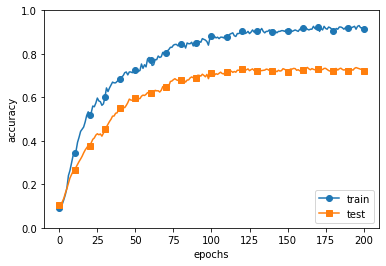

In [59]:
# 오버피팅 방지용: 가중치감소 (decaying weight)
# 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제하는 방법
# 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는경우가 대다수
# 손실함수에 가중치의 L2노름을 더한 가중치 감소방법


# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
# 두 acc간의 간격이 줄어들었음

In [60]:
# 드랍아웃(drop out)
# 뉴런을 임의로 삭제하면서 학습하는 방법
# 훈련때 은닉층의 뉴런을 무작위로 골라 삭제함
# 삭제된 뉴런은 신호를 전달하지 않게됨
# 훈련때는 데이터를 흘릴때마다 삭제할 뉴런을 무작위로 선택하고, 시험할때는 모든 뉴런에 신호를 전달함
# 시험때는 각 뉴런의 출력에 훈련때 삭제안한 비율을 곱하여 출력함
class Dropout:
  def __init__(self, dropout_ratio =0.5):
    self.dropout_ratio = dropout_ratio 
    self.mask = None

  def forward(self, x, train_flg = True): 
    if train_flg: #  train_flg = True 훈련시에는 순전파 때마다 삭제할 뉴런을 false로 표시
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio 
      return x*self.mask
    
    else : 
      return x*(1.0 - self.dropout_ratio)
    
  def backward(self, dout): # relu와 같음, 순전파때 신호를 통과시키는 뉴런은 역전파때도 신호를 그대로 통과시키고, 순전파때 통과시키지 않은 뉴런은 역전파때도 신호차단
    return dout * self.mask 


train loss:2.306904087919828
=== epoch:1, train acc:0.11666666666666667, test acc:0.1137 ===
train loss:2.3074513583364555
train loss:2.3129723251611995
train loss:2.3143567388681765
=== epoch:2, train acc:0.12333333333333334, test acc:0.1151 ===
train loss:2.2991808369175075
train loss:2.3094032542619023
train loss:2.306011326498018
=== epoch:3, train acc:0.12333333333333334, test acc:0.1167 ===
train loss:2.3033329908535944
train loss:2.3000323486673095
train loss:2.3056937763365584
=== epoch:4, train acc:0.12666666666666668, test acc:0.1196 ===
train loss:2.3073060611465404
train loss:2.300166372610188
train loss:2.302622768446473
=== epoch:5, train acc:0.14, test acc:0.1224 ===
train loss:2.3069459964240684
train loss:2.2988684935546897
train loss:2.3071026909632435
=== epoch:6, train acc:0.15333333333333332, test acc:0.1259 ===
train loss:2.306186961423251
train loss:2.301121020339581
train loss:2.3058770513184252
=== epoch:7, train acc:0.15333333333333332, test acc:0.1309 ===
tra

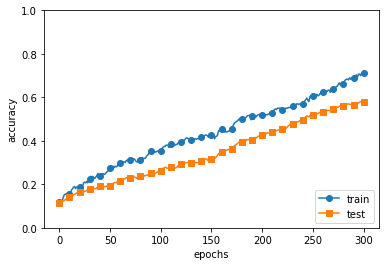

In [61]:
### coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784,
                              hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout,
                              dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
# epoch:301, train acc:0.73, test acc:0.6315

In [62]:
# dropout을 적용시  훈련데이터와 시험데이터에 대한 정확도 차이가 감소


In [64]:
# 적절한 하이퍼파라미터 찾기
# 뉴런수, 배치크기, 매개변수갱신시 학습률과 가중치 감소률등
# 하이퍼파라미터의 성능을 평가할때는 시험데이터를 사용해서 안됨(중요!)
# 하이퍼파라미터 전용 확인데이터가 필요(validation data)
# 훈련데이터 : 매개변수학습
# 검증데이터 : 하이퍼파라미터성능평가
# 시험데이터 : 신경망의 범용성능 평가


In [67]:
from common.util import *
(x_train, t_train), (x_test, t_test) = load_mnist()
x_train, t_train = shuffle_dataset(x_train, t_train)
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = x_train[validation_num:]

In [68]:
# 하이퍼파라미터를 최적화할때의 핵심은 하이퍼파라미터의 최적값이 존재하는 범위를 조금씩 줄여가는것
# 범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터값을 골라낸후, 그 값으로 정확도를 평가
# 하이퍼파라미터의 범위는 대략적으로 지정하는것이 효과적



val acc:0.1 | lr:2.5657805635443897e-06, weight decay:3.261037971980958e-07
val acc:0.13 | lr:3.207455299003434e-05, weight decay:4.293734433887859e-06
val acc:0.09 | lr:0.00046132441915134, weight decay:2.216468190785819e-06
val acc:0.05 | lr:1.7222268565839515e-06, weight decay:4.1731573554603054e-05
val acc:0.15 | lr:0.0009501321035748135, weight decay:4.18996014271824e-08
val acc:0.06 | lr:1.3045386386218909e-06, weight decay:1.4729867638614423e-07
val acc:0.14 | lr:3.224378361801174e-06, weight decay:2.7810987496104533e-08
val acc:0.14 | lr:0.0001236163802445288, weight decay:2.9399533046767748e-08
val acc:0.08 | lr:2.4470590861091277e-05, weight decay:1.0023165037135063e-07
val acc:0.1 | lr:3.209639994518135e-06, weight decay:1.7930242419195104e-08
val acc:0.14 | lr:6.018870241412246e-05, weight decay:6.182114230057707e-06
val acc:0.12 | lr:1.0221681531759824e-05, weight decay:3.2512793838191316e-07
val acc:0.08 | lr:0.00031769176580046947, weight decay:9.106657140353981e-08
val 

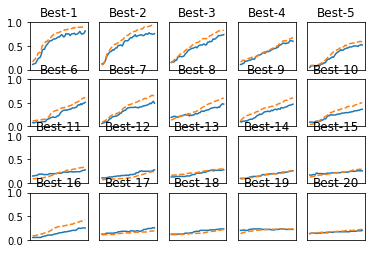

In [69]:
# 하이퍼파라미터 최적화 구현하기
# coding: utf-8
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
